In this analysis, I will use pandas to look through the changes in computer usage at home across OECD countries. The data was taken from **Kaggle** and it is available at: https://www.kaggle.com/babyoda/access-to-computers-from-home-oecd.

Some of the tools I will use are:
- pandas
- matplotlib
- vega_datasets
- altair

First, let's look at the data we will analyze and visualize. Let's look at the first few observations, the summary stats, and the columns. 

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
comp=pd.read_csv("access_comp.csv")
comp.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,DNK,HOMECOMP,TOT,PC_HH,A,2006,84.9749,NaN
1,DNK,HOMECOMP,TOT,PC_HH,A,2007,82.9604,NaN
2,DNK,HOMECOMP,TOT,PC_HH,A,2008,85.4588,NaN
3,DNK,HOMECOMP,TOT,PC_HH,A,2009,86.2344,NaN
4,DNK,HOMECOMP,TOT,PC_HH,A,2010,88.0249,NaN


In [170]:
comp.describe()

,TIME,Value
count,388.000000,388.000000
mean,2011.046392,69.458372
std,3.578274,18.216735
min,2005.000000,13.123448
25%,2008.000000,57.316925
50%,2011.000000,74.420400
75%,2013.000000,82.213024
max,2019.000000,97.610754


In [171]:
comp.LOCATION.unique()

array(['DNK', 'DEU', 'ISL', 'JPN', 'CZE', 'FRA', 'HUN', 'SVN', 'AUT',
       'POL', 'ESP', 'TUR', 'CHL', 'GRC', 'IRL', 'KOR', 'NLD', 'AUS',
       'CAN', 'FIN', 'USA', 'MEX', 'NOR', 'SVK', 'CHE', 'BRA', 'ISR',
       'ITA', 'LUX', 'PRT', 'EST', 'BEL', 'SWE', 'GBR', 'NZL', 'LVA',
       'LTU', 'COL', 'CRI'], dtype=object)

I will now keep only the relevant columns which will be used for the visualization: **LOCATION** (*the country*), **TIME** (*the year*), and **Value** (*percentage of computers at home*).

In [172]:
comp_new=comp.loc[:,["LOCATION","TIME","Value"]]
comp_new.head(5)

,LOCATION,TIME,Value
0,DNK,2006,84.9749
1,DNK,2007,82.9604
2,DNK,2008,85.4588
3,DNK,2009,86.2344
4,DNK,2010,88.0249


As a test, let's plot how the percentage has evolved in **Denmark** and the **Mexico** for the past 14 years. First, it will make it easier if we convert the TIME column which is now an integer to a date:

In [173]:
comp_new.dtypes
comp_new["Time"]=pd.to_datetime(comp_new["TIME"],format="%Y")
comp_new.head(5)

,LOCATION,TIME,Value,Time
0,DNK,2006,84.9749,2006-01-01
1,DNK,2007,82.9604,2007-01-01
2,DNK,2008,85.4588,2008-01-01
3,DNK,2009,86.2344,2009-01-01
4,DNK,2010,88.0249,2010-01-01


In [175]:
dnk=comp_new.loc[comp_new["LOCATION"]=="DNK",["Time","Value"]]
mex=comp_new.loc[comp_new["LOCATION"]=="MEX",["Time","Value"]]
mex.head()

,Time,Value
200,2005-01-01,18.56
201,2006-01-01,20.62
202,2007-01-01,22.12
203,2008-01-01,25.65
204,2009-01-01,26.76


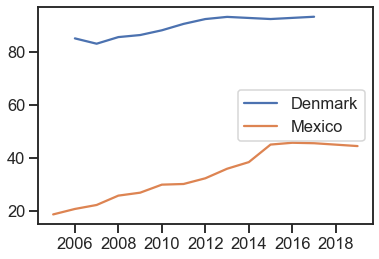

In [176]:
plt.plot(dnk.Time,dnk.Value,label="Denmark")
plt.plot(mex.Time,mex.Value,label="Mexico")
plt.legend()

By taking the above as an example, we might expect a wide gap in access to computer at home between developed countries (*Denkmark* above) and developing (*Mexico* above).

In [177]:
import altair as alt
Chart(comp_new).mark_point().encode(x="Time",y="Value",color="LOCATION")

alt.Chart(...)

In [178]:
comp_new["LOCATION"].nunique()

39

There are too many unique codes and it is not quite clear which country is which. Therefore, let's organize the data in the following way:
- First, let's use the IBAN country codes (https://www.iban.com/country-codes) to add a country name to the dataframe.
- Second, let's organize the countries into groups by their HDI on 2020 (https://worldpopulationreview.com/country-rankings/hdi-by-country). 

This will allow us to better understand the gap between countries and regions when it comes to access to a computer at home.

```
To accomplish that I will first download a list of countries and their codes and HDI as a separate dataframes. 
I will inner join them with the comp_new data frame and will then create a label based off the HDI.
Lastly, I leave only relevant columns to have a cleaner dataframe.

```

In [179]:
codes=pd.read_csv("country_code.csv")
codes.head(5)

,Country,Two_code,Three_code,number_code
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [180]:
codes=codes.loc[:,["Country","Three_code"]]
codes.head(5)

,Country,Three_code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [181]:
hdi=pd.read_csv("hdi.csv")
hdi.head(5)

,country,hdi,pop2020
0,Norway,0.954,5421.241
1,Switzerland,0.946,8654.622
2,Ireland,0.942,4937.786
3,Hong Kong,0.939,7496.981
4,Germany,0.939,83783.942


In [182]:
comp_new_2=pd.merge(comp_new,codes,how="inner",left_on="LOCATION",right_on="Three_code")
comp_new_2=pd.merge(comp_new_2,hdi,how="inner",left_on="Country",right_on="country")
comp_new_2=comp_new_2.loc[:,["LOCATION","TIME","Value","Time","Country","hdi"]]
comp_new_2.head(5)

,LOCATION,TIME,Value,Time,Country,hdi
0,DNK,2006,84.9749,2006-01-01,Denmark,0.93
1,DNK,2007,82.9604,2007-01-01,Denmark,0.93
2,DNK,2008,85.4588,2008-01-01,Denmark,0.93
3,DNK,2009,86.2344,2009-01-01,Denmark,0.93
4,DNK,2010,88.0249,2010-01-01,Denmark,0.93


Now, we have all the information we need. Let's look at the range of HDI for the 39 countries in our data:

In [183]:
comp_new_2["hdi"].unique()

array([0.93 , 0.939, 0.938, 0.915, 0.891, 0.845, 0.902, 0.914, 0.872,
       0.893, 0.806, 0.847, 0.942, 0.922, 0.925, 0.767, 0.954, 0.857,
       0.946, 0.761, 0.906, 0.883, 0.909, 0.85 , 0.882, 0.919, 0.937,
       0.921, 0.854, 0.869, 0.794])

Let's group the countries now. HDI's above 0.90 will be grouped as **high** for highly developed. HDI's from 0.80 to 0.90 will be labeled **medium-high**, and those below 0.80 will be labeled **medium**. The labeling is somewhat arbitraty especially given we are using the HDI for 2020 to classify the country. However, it will be helpful to illustrate the differences and see if there are any *outliers* in the data: countries with high HDI but with low access to computers from home or vice and versa.

To accomplish this, I will go through a for loop and if statements which will read a country's HDI and classify it based on the labels mentioned above:

In [185]:
status=[]
for i in range(len(comp_new_2)):
    if comp_new_2.iloc[i,5]>=0.90:
        status.append("High")
    elif comp_new_2.iloc[i,5]<0.80:
        status.append("Medium")
    else:
        status.append("Medium-High")

len(status)

339

In [186]:
comp_new_2=comp_new_2.assign(Status= status)
comp_new_2=comp_new_2.loc[:,["LOCATION","TIME","Value","Time","Country","Status"]]
comp_new_2.head(5)

,LOCATION,TIME,Value,Time,Country,Status
0,DNK,2006,84.9749,2006-01-01,Denmark,High
1,DNK,2007,82.9604,2007-01-01,Denmark,High
2,DNK,2008,85.4588,2008-01-01,Denmark,High
3,DNK,2009,86.2344,2009-01-01,Denmark,High
4,DNK,2010,88.0249,2010-01-01,Denmark,High


In [187]:
comp_new_2.Status.unique()

array(['High', 'Medium-High', 'Medium'], dtype=object)

Now, we can replot the data and group the changes in access to computer through time by the HDI in each country:

In [189]:
from vega_datasets import data
alt.Chart(comp_new_2).mark_point().encode(x='Time',y='Value',color='Status')

alt.Chart(...)

There is a trend in which all countries are having more people with access to computers at home over time. But it looks like some groups are having a higher increase than others. Lets check if this is true by plotting a best fit line to see clearly the changes across all groups with the passage of time:
- First, I will separate the dataframe into 3 dataframes for each group
- Then, I create 1D arrays for time and for values
- Lastly, I create slope variables for the line of best fit using polyfit
- I will recombine the polyfit arrays and their respective time arrays so I can plot them using Altair

In [486]:
import numpy as np

high=comp_new_2.loc[comp_new_2.Status=="High",:]
medium_high=comp_new_2.loc[comp_new_2.Status=="Medium-High",:]
medium=comp_new_2.loc[comp_new_2.Status=="Medium",:]


time_high=np.array(high.TIME)
value_high=np.array(high.Value)

time_medhigh=np.array(medium_high.TIME)
value_medhigh=np.array(medium_high.Value)

time_med=np.array(medium.TIME)
value_med=np.array(medium.Value)

m1,b1=np.polyfit(time_high,value_high,1)
m2,b2=np.polyfit(time_medhigh,value_medhigh,1)
m3,b3=np.polyfit(time_med,value_med,1)

high_df=pd.DataFrame({'Time':time_high,'PredValue':(time_high*m1+b1)})
medhigh_df=pd.DataFrame({'Time':time_medhigh,'PredValue':(time_medhigh*m2+b2)})
medium_df=pd.DataFrame({'Time':time_med,'PredValue':(time_med*m3+b3)})

Now, with the new dataframes for the **best-fit** lines ready, we can create the same plot from above and the add the line to that plot so we can see the average change for the group over time by building a layered chart:

In [487]:
alt.Chart(comp_new_2).mark_point().encode(x='Time',y='Value',color='Status')+alt.Chart(
    high_df).mark_line(color='blue').encode(x=alt.X('Time',axis=None)
                                            ,y='PredValue')+alt.Chart(
    medhigh_df).mark_line(color='red').encode(x=alt.X('Time',axis=None)
                                              ,y='PredValue')+alt.Chart(
    medium_df).mark_line(color='orange').encode(x=alt.X('Time',axis=None)
                                                ,y='PredValue')

alt.LayerChart(...)

Now, it seems like groups in the medium to medium-high groups are seeing much larger improvements in the rates of access. This is expected since groups with higher access will have less room to improve. Let's look next at the change over the timeseries for each of the countries:

- I first create empty list for mininum and max values and an array of unique countries in the dataframe
- Then, look for the maximum and minimum year for each of the countries
- Lastly, I append the lists with the values for the minimum and maximum year

This will enable me to find the first value observation and last value observation of the set since not all of them have the same start and finish:

In [490]:
listmax=[]
listmin=[]
liststatus=[]
unique_loc=comp_new_2.Country.unique()
for i in unique_loc:
    x=comp_new_2.loc[comp_new_2.Country==i,["TIME"]].max().TIME
    y=comp_new_2.loc[comp_new_2.Country==i,["TIME"]].min().TIME
    to_append_max=comp_new_2.loc[(comp_new_2.Country==i)& (comp_new_2.TIME==x),:].Value.values[0]
    to_append_min=comp_new_2.loc[(comp_new_2.Country==i)& (comp_new_2.TIME==y),:].Value.values[0]
    to_append_status=comp_new_2.loc[(comp_new_2.Country==i)& (comp_new_2.TIME==y),:].Status.values[0]
    listmax.append(to_append_max)
    listmin.append(to_append_min)
    liststatus.append(to_append_status)
    
comp_new_3=pd.DataFrame({'Country':unique_loc,'min':listmin,'max':listmax,'status':liststatus})
comp_new_3.head(10)

,Country,min,max,status
0,Denmark,84.9749,93.136890,High
1,Germany,76.8558,92.865556,High
2,Iceland,84.6127,97.297245,High
3,Japan,80.5000,74.000000,High
4,France,65.5494,84.124964,Medium-High
5,Hungary,48.8040,79.674757,Medium-High
6,Slovenia,65.2631,79.503036,High
7,Austria,67.0669,85.373276,High
8,Poland,45.4124,81.776947,Medium-High
9,Spain,55.8676,78.385013,Medium-High


Now that we have the min and max values for each country, we can calculate the difference, add back to this dataframe the Status of each country (*High, Medium-High, Medium*) and find the averages for each of the groups:

In [512]:
comp_new_3['diff']=comp_new_3['max']-comp_new_3['min']
comp_new_3.head(5)

,Country,min,max,status,diff
0,Denmark,84.9749,93.136890,High,8.161990
1,Germany,76.8558,92.865556,High,16.009756
2,Iceland,84.6127,97.297245,High,12.684545
3,Japan,80.5000,74.000000,High,-6.500000
4,France,65.5494,84.124964,Medium-High,18.575564


In [513]:
alt.Chart(comp_new_3).mark_boxplot().encode(x='status',y='diff').properties(width=200)

alt.Chart(...)

As we saw before, the **Medium-High** countries did have the highest changes in access to computers at home over the time. It is interesting to see that **Japan** had a decrease over time. To finish up, I want to analyse this change in Japan closely and graphing the lines for each of the **Medium-High** countries:

In [511]:
japan=comp_new_2[comp_new_2.Country=="Japan"]
alt.Chart(japan).mark_area().encode(x='Time',y=alt.Y('Value',scale=alt.Scale(zero=False)))

alt.Chart(...)

In [507]:
med_high=comp_new_2[comp_new_2.Status=="Medium-High"]
chart1=alt.Chart(med_high).mark_line().encode(x='Time',y=alt.Y('Value',scale=alt.Scale(zero=False)),color='Country')
chart1


alt.Chart(...)

As we see above, Japan did have a large drop of over 8% in the period analyzed. It was the only country to have a drop below zero. Meanwhile, it is worth it noting the large increases in rates of accessibility for the **Medium-High** countries as shown graphically above and in the table below. 

In [529]:
comp_new_3.groupby(["status"]).mean()

,min,max,diff
status,,,
High,72.615894,87.178271,14.562377
Medium,20.820862,43.821204,23.000342
Medium-High,45.687092,74.439767,28.752674
